In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

0
params\singles\VR\attempt3\Lastencodersingle_vr_50.pt


[]

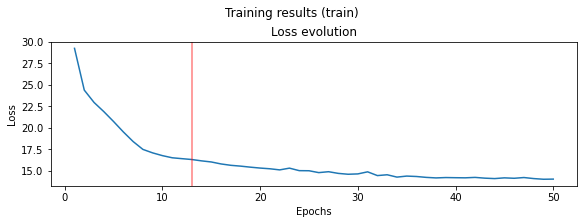

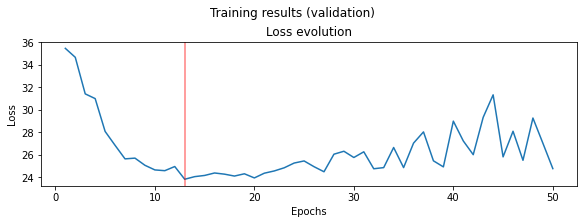

In [19]:
state_dirs = "params\singles\VR\\attempt3\Lastencodersingle_vr_50.pt"
NAME = "multi_inf"
n_curves = 1
states = []
for i in range(n_curves):
    print(i)
    print(state_dirs)
    awa = torch.load(state_dirs)
    states.append(torch.load(state_dirs))

fig, (train_loss) = plt.subplots(ncols = 1, figsize = (8,3), layout = "constrained")
fig.suptitle("Training results (train)")
for i, state in enumerate(states):
    n_epochs = np.arange(1,len(state["loss"][0]) + 1, 1)
    train_loss.plot(n_epochs , state["loss"][0], )
    # train_acc.plot(n_epochs , state["acc"][0], label = labels[i]),
# for i, state in enumerate(states):
    pos = np.argmin([state["loss"][1]])
    train_loss.axvline(x = pos + 1, color = 'r', alpha=0.5)

train_loss.set_xlabel("Epochs")
train_loss.set_ylabel("Loss")
train_loss.set_title("Loss evolution")

# train_acc.set_xlabel("Epochs"),
# train_acc.set_ylabel("Acc"),
# train_acc.set_title("Accuracy evolution"),

# plt.legend(fontsize = "x-small")
plt.plot()
# plt.savefig(f"{NAME}_train.png",dpi = 300)

fig, (val_loss) = plt.subplots(ncols = 1, figsize = (8,3), layout = "constrained")
fig.suptitle("Training results (validation)")

for i, state in enumerate(states):
    n_epochs = np.arange(1,len(state["loss"][0]) + 1 ,1)
    val_loss.plot(n_epochs , state["loss"][1],)
    # val_acc.plot(n_epochs , state["acc"][1], label = labels[i]),
    pos = np.argmin([state["loss"][1]])
    val_loss.axvline(x = pos + 1, color = 'r', alpha=0.5)
val_loss.set_xlabel("Epochs")
val_loss.set_ylabel("Loss")
val_loss.set_title("Loss evolution")

# val_acc.set_xlabel("Epochs"),
# val_acc.set_ylabel("Acc"),
# val_acc.set_title("Accuracy evolution"),

# plt.legend(fontsize = "x-small")
plt.plot() 
# plt.savefig(f"{NAME}_val.png",dpi = 300)

In [20]:
for i, state in enumerate(states):
    # print(labels[i])
    pos = np.argmin(state["loss"][1])
    t = state["loss"][0][pos]
    v = state["loss"][1][pos]
    print(f"Train loss {t}")
    print(f"Val loss {v}") 

Train loss 16.31130599975586
Val loss 23.81941795349121


## Lo mismo pero pa downstream

0
('params\\multis\\infonce\\attempt2\\downstream\\uwu\\LastDownmulti_inf_30.pt',)


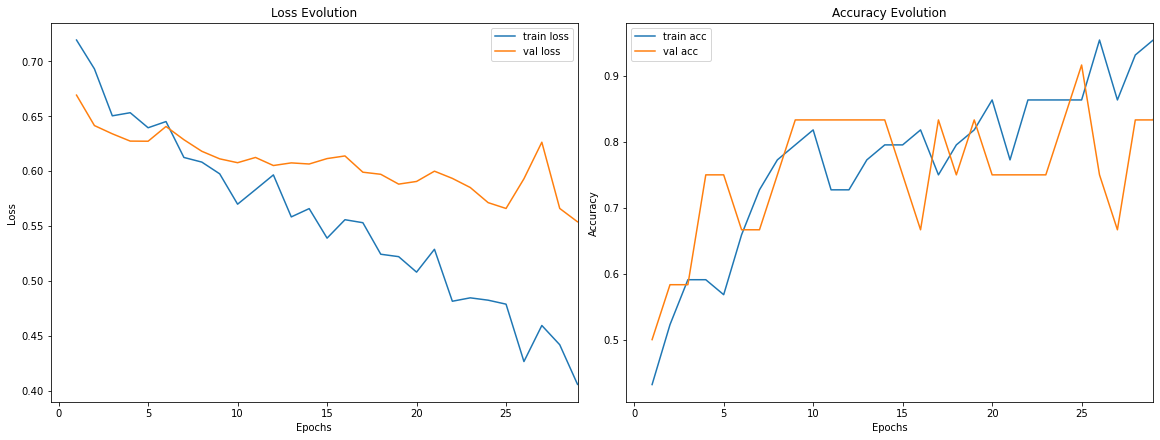

In [27]:
state_dirs = ("params\\multis\\infonce\\attempt2\\downstream\\uwu\\LastDownmulti_inf_30.pt",)

# state_dirs = ("params\multis\VR\downstream\LastDownmulti_vr_30.pt",)
NAME = "multi_vr_inf"
n_curves = 1
states = []
for i in range(n_curves):
    print(i)
    print(state_dirs)
    awa = torch.load(state_dirs[i])
    states.append(torch.load(state_dirs[i]))

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16,6), layout = "constrained")
# plt.tight_layout()
# colors = ['b', 'g', 'r', 'c', 'm']
for i, state in enumerate(states):
    n_epochs = np.arange(1,len(state["loss"][0]) + 1, 1)
    ax1.plot(n_epochs , state["loss"][0], label = f"train loss")
    ax1.plot(n_epochs , state["loss"][1], label = f"val loss")
    ax2.plot(n_epochs , state["acc"][0], label = f"train acc")
    ax2.plot(n_epochs , state["acc"][1], label = f"val acc")
    # ax1.axvline(x = best[i], color = colors[i], alpha=0.5)
    # ax2.axvline(x = best[i], color = colors[i], alpha=0.5)

# Agregamos con una linea la mejor de cada una
ax1.legend()
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_xlim(right = 29)
ax1.set_title('Loss Evolution')
ax2.legend()

ax2.set_xlim(right = 29)
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title('Accuracy Evolution')
plt.savefig(f"{NAME}.png", dpi = 300)

In [26]:
for i, state in enumerate(states):
    # print(labels[i])
    pos = np.argmin(state["loss"][1])
    t = state["loss"][0][pos]
    v = state["loss"][1][pos]
    te = state["acc"][0][pos] * 100
    ve = state["acc"][1][pos + 1] * 100
    print(f"Train loss {t}")
    
    print(f"Val loss {v}")
    print(f"Train acc {te}")
    print(f"Val acc {ve}") 


Train loss 0.4046393483877182
Val loss 0.5072590708732605
Train acc 86.36363636363636
Val acc 83.33333333333334
